In [1]:
#from numpy.core.numeric import NaN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
initial_Features=pd.read_csv('tox21_global_cdf_rdkit.csv')
initial_dataset=pd.read_csv('tox21.csv')
initial_Features=initial_Features.loc[:,initial_Features.apply(pd.Series.nunique) !=1]
initial_dataset=initial_dataset.iloc[initial_Features.dropna().index]
initial_dataset=initial_dataset.reset_index()
initial_Features=initial_Features.dropna()
initial_Features=initial_Features.reset_index()
index_array=[]
for i in np.arange (1,13):
   index_array.append(initial_dataset.iloc[:,i+1].dropna().index)


In [3]:
from pandas.core.frame import DataFrame
def label_ith(i):
    return pd.DataFrame(data=initial_dataset.iloc[index_array[i]].iloc[:,i+2])
def Feature_ith(i):
    return initial_Features.iloc[index_array[i]].drop('index',axis=1)

In [16]:
Feature_ith(3).head()


,"('BalabanJ', <class 'numpy.float64'>)","('BertzCT', <class 'numpy.float64'>)","('Chi0', <class 'numpy.float64'>)","('Chi0n', <class 'numpy.float64'>)","('Chi0v', <class 'numpy.float64'>)","('Chi1', <class 'numpy.float64'>)","('Chi1n', <class 'numpy.float64'>)","('Chi1v', <class 'numpy.float64'>)","('Chi2n', <class 'numpy.float64'>)","('Chi2v', <class 'numpy.float64'>)",...,"('fr_sulfonamd', <class 'numpy.float64'>)","('fr_sulfone', <class 'numpy.float64'>)","('fr_term_acetylene', <class 'numpy.float64'>)","('fr_tetrazole', <class 'numpy.float64'>)","('fr_thiazole', <class 'numpy.float64'>)","('fr_thiocyan', <class 'numpy.float64'>)","('fr_thiophene', <class 'numpy.float64'>)","('fr_unbrch_alkane', <class 'numpy.float64'>)","('fr_urea', <class 'numpy.float64'>)","('qed', <class 'numpy.float64'>)"
1,0.875932,0.047173,0.029397,0.031876,0.021488,0.033104,0.040950,0.025747,0.036181,0.019621,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,1.000000,0.738638
3,0.967576,0.059713,0.178132,0.308372,0.257215,0.133949,0.290161,0.221362,0.231685,0.153900,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.878233
4,0.998591,0.009412,0.013743,0.002718,0.008883,0.002707,0.001133,0.048074,0.004498,0.305146,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.193474
5,0.996279,0.014875,0.248635,0.451559,0.397276,0.081282,0.249279,0.185958,0.757884,0.673664,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.353220
6,0.983223,0.023970,0.003767,0.001617,0.005040,0.003058,0.001910,0.025910,0.002349,0.061524,...,1.593061e-17,5.766101e-14,2.957989e-11,0.168378,0.16738,1.481515e-18,2.324150e-16,4.703598e-08,0.166633,0.521625


In [17]:
# shape of dataset
for i in np.arange(0,12):
 print('Dimension of',i,'th labels: ',label_ith(i).shape,'    Dimension of features: ', Feature_ith(i).shape)



Dimension of 0 th labels:  (7166, 1)     Dimension of features:  (7166, 190)
Dimension of 1 th labels:  (6681, 1)     Dimension of features:  (6681, 190)
Dimension of 2 th labels:  (6475, 1)     Dimension of features:  (6475, 190)
Dimension of 3 th labels:  (5761, 1)     Dimension of features:  (5761, 190)
Dimension of 4 th labels:  (6128, 1)     Dimension of features:  (6128, 190)
Dimension of 5 th labels:  (6865, 1)     Dimension of features:  (6865, 190)
Dimension of 6 th labels:  (6373, 1)     Dimension of features:  (6373, 190)
Dimension of 7 th labels:  (5765, 1)     Dimension of features:  (5765, 190)
Dimension of 8 th labels:  (6991, 1)     Dimension of features:  (6991, 190)
Dimension of 9 th labels:  (6388, 1)     Dimension of features:  (6388, 190)
Dimension of 10 th labels:  (5735, 1)     Dimension of features:  (5735, 190)
Dimension of 11 th labels:  (6697, 1)     Dimension of features:  (6697, 190)


In [4]:
from sklearn.model_selection import train_test_split
X_training_data=[]
X_test=[]
y_training_data=[]
y_test=[]
for i in np.arange(0,12):
    X_training_data_tmp, X_test_tmp, y_training_data_tmp,y_test_tmp =train_test_split(
        Feature_ith(i),label_ith(i),stratify=label_ith(i),test_size=0.10,random_state=1234)
    X_training_data.append(X_training_data_tmp)
    X_test.append(X_test_tmp)
    y_training_data.append(y_training_data_tmp)
    y_test.append(y_test_tmp)

C:\Users\b\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1462: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1462: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

C:\Users\b\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1462: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\b\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1462: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, chec

In [5]:
from sklearn.decomposition import PCA
X_training_data_pca=[]
X_test_pca=[]
for i in np.arange(0,12):
  pca = PCA(n_components=71)
  principalComponents = pca.fit_transform(X_training_data[i])
  X_training_data_PCA_tmp = pd.DataFrame(data = principalComponents)
  X_training_data_pca.append(X_training_data_PCA_tmp)
  X_test_pca_tmp=pd.DataFrame(data = pca.transform(X_test[i]))
  X_test_pca.append(X_test_pca_tmp)
  print('PCA with 71 principal components retains',np.sum(pca.explained_variance_ratio_)*100,'% of data VAR. (It is related for',i,'th label)')



C:\Users\b\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
C:\Users\b\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, fit_path=True,
C:\Us

PCA with 71 principal components retains 95.15331650415595 % of data VAR. (It is related for 0 th label)
PCA with 71 principal components retains 95.18409335880827 % of data VAR. (It is related for 1 th label)
PCA with 71 principal components retains 95.23431249562562 % of data VAR. (It is related for 2 th label)
PCA with 71 principal components retains 95.25005422669034 % of data VAR. (It is related for 3 th label)
PCA with 71 principal components retains 95.18368655979383 % of data VAR. (It is related for 4 th label)
PCA with 71 principal components retains 95.18941892999774 % of data VAR. (It is related for 5 th label)
PCA with 71 principal components retains 95.14565128265984 % of data VAR. (It is related for 6 th label)
PCA with 71 principal components retains 95.20923266754531 % of data VAR. (It is related for 7 th label)
PCA with 71 principal components retains 95.17823610539105 % of data VAR. (It is related for 8 th label)
PCA with 71 principal components retains 95.16058806397

In [39]:
# Function to calculate 0 and 1 labels in test and train
def labels_counter(df1):
# count of 1 & 0 labels
  ones1=df1.sum()
  zeros1=df1.shape[0]-ones1
# Make a table with the results
  label_val_table1 = pd.concat([ones1,zeros1], axis=1)
# Rename the columns
  label_val_table_ren_columns1= label_val_table1.rename(
  columns = {0:'Label:1',1:'Label:0'} 
  )
# Return the dataframe with missing information
  return label_val_table_ren_columns1


In [89]:
print( '       *training set* ','*test set*')
for i in np.arange(0,12):
    label_train=labels_counter(y_training_data[i])
    label_test=labels_counter(y_test[i])
    l=pd.concat([label_train,label_test], axis=1)
    ll=pd.DataFrame(l)
    display(ll)

       *training set*  *test set*


,Label:1,Label:0,Label:1,Label:0
NR-AR,276.0,6173.0,31.0,686.0


,Label:1,Label:0,Label:1,Label:0
NR-AR-LBD,205.0,5807.0,23.0,646.0


,Label:1,Label:0,Label:1,Label:0
NR-AhR,691.0,5136.0,77.0,571.0


,Label:1,Label:0,Label:1,Label:0
NR-Aromatase,268.0,4916.0,30.0,547.0


,Label:1,Label:0,Label:1,Label:0
NR-ER,707.0,4808.0,79.0,534.0


,Label:1,Label:0,Label:1,Label:0
NR-ER-LBD,300.0,5878.0,33.0,654.0


,Label:1,Label:0,Label:1,Label:0
NR-PPAR-gamma,153.0,5582.0,17.0,621.0


,Label:1,Label:0,Label:1,Label:0
SR-ARE,821.0,4367.0,91.0,486.0


,Label:1,Label:0,Label:1,Label:0
SR-ATAD5,228.0,6063.0,25.0,675.0


,Label:1,Label:0,Label:1,Label:0
SR-HSE,310.0,5439.0,35.0,604.0


,Label:1,Label:0,Label:1,Label:0
SR-MMP,811.0,4350.0,90.0,484.0


,Label:1,Label:0,Label:1,Label:0
SR-p53,366.0,5661.0,41.0,629.0


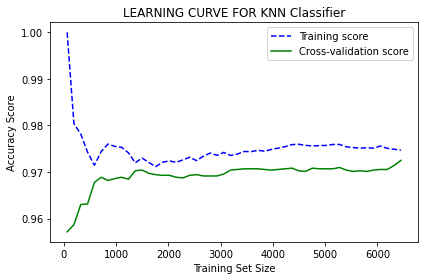

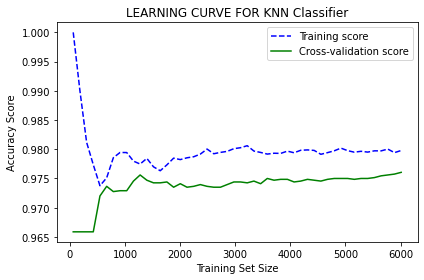

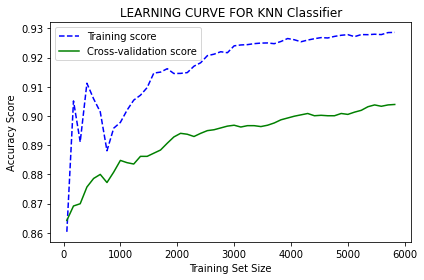

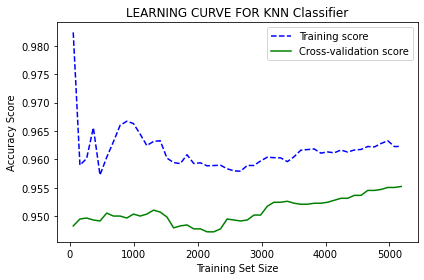

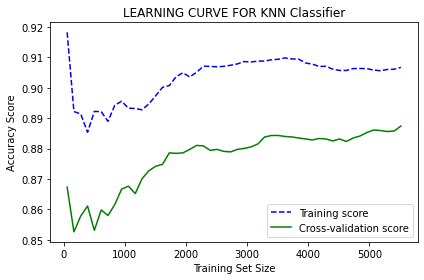

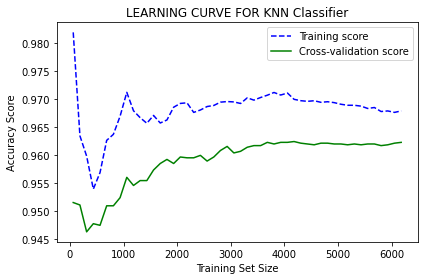

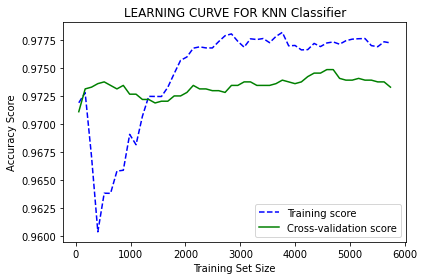

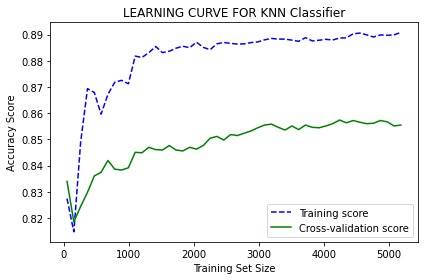

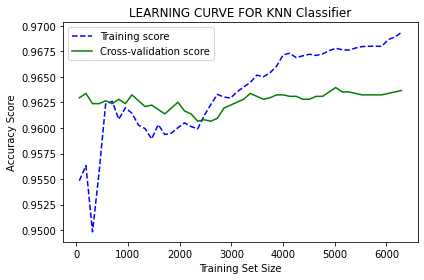

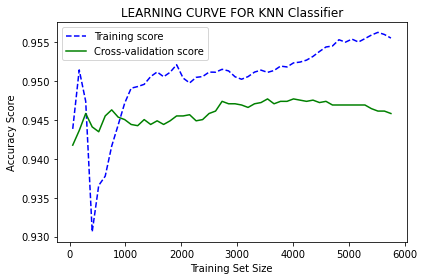

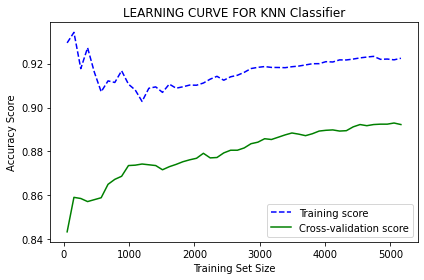

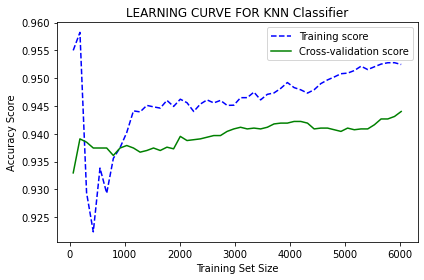

In [56]:
#Importing Required Libraries and Modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

for i in np.arange(0,12):
# X contains data and y contains labels
  X, y = Feature_ith(i),label_ith(i)

# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
  sizes, training_scores, testing_scores = learning_curve(KNeighborsClassifier(), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

# Mean and Standard Deviation of training scores
  mean_training = np.mean(training_scores, axis=1)
  Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
  mean_testing = np.mean(testing_scores, axis=1)
  Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score
  plt.plot(sizes, mean_training, '--', color="b", label="Training score")
  plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
  plt.title("LEARNING CURVE FOR KNN Classifier")
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()


Logistic: f1=0.612 auc=0.559


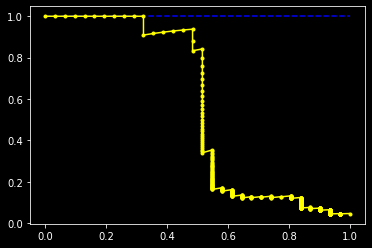

Logistic: f1=0.727 auc=0.727


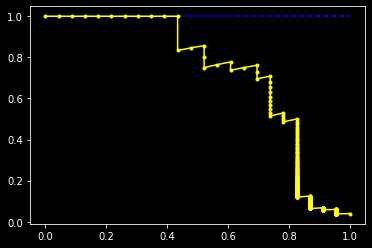

Logistic: f1=0.450 auc=0.576


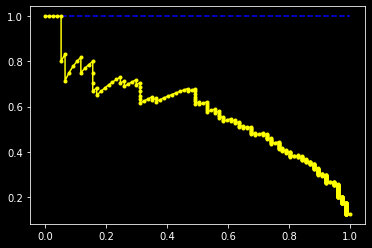

Logistic: f1=0.279 auc=0.319


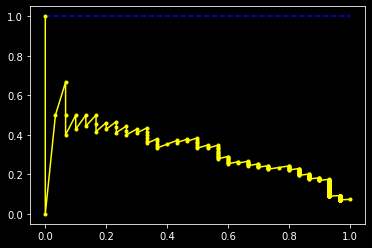

Logistic: f1=0.355 auc=0.377


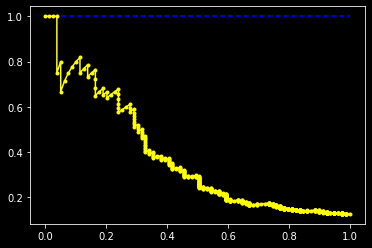

Logistic: f1=0.372 auc=0.421


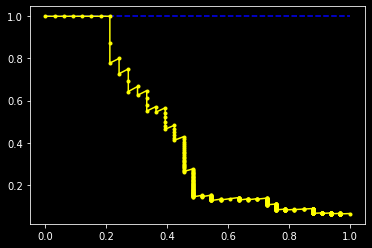

Logistic: f1=0.000 auc=0.365


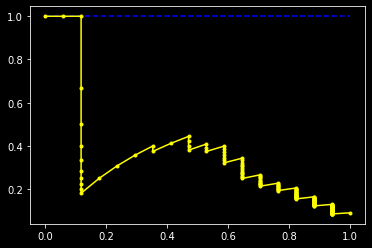

Logistic: f1=0.372 auc=0.450


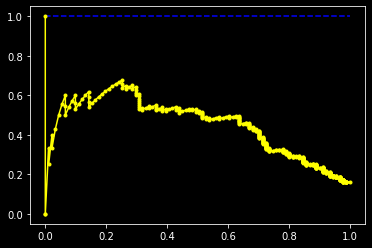

Logistic: f1=0.000 auc=0.187


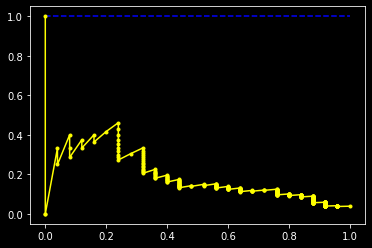

Logistic: f1=0.233 auc=0.320


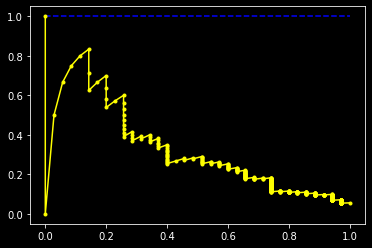

Logistic: f1=0.561 auc=0.614


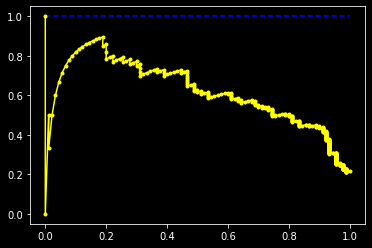

Logistic: f1=0.231 auc=0.392


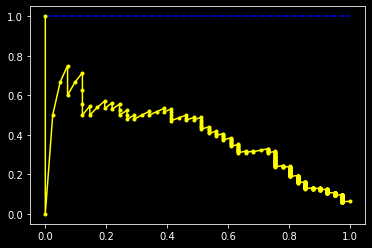

In [133]:

# precision-recall curve and f1 for an imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from matplotlib.pyplot import cm
for i in np.arange(0,12):
  model = LogisticRegression(solver='lbfgs')
  model.fit(X_training_data[i], y_training_data[i])
  dataset_probs = model.predict_proba(X_test[i])
  # keep probabilities for the positive outcome only
  dataset_probs = dataset_probs[:, 1]
  # predict class values
  yhat = model.predict(X_test[i])
  # calculate precision and recall for each threshold
  dataset_precision, dataset_recall, _ = precision_recall_curve(y_test[i], dataset_probs)
  # calculate scores
  dataset_f1, dataset_auc = f1_score(y_test[i], yhat), auc(dataset_recall, dataset_precision)
  # summarize scores
  print('Logistic: f1=%.3f auc=%.3f' % (dataset_f1, dataset_auc))

  # plot the precision-recall curves
 
 
  no_skill = len(y_test[i][y_test[i]==1]) / len(y_test[i])
  plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill',c='b' )
  plt.plot(dataset_recall, dataset_precision, marker='.', label='Logistic',c='yellow') 
  plt.show()
